In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from numba import jit

In [3]:
def f_sym(x,a):
    a_ = a*np.exp(2j*x)/(1-a*np.exp(2j*x))
    f = 1/(2*np.pi) * (1+ (a_+a_.conjugate()))
    return f

def f_asym(x,a):
    a_ = a*np.exp(1j*x)/(1-a*np.exp(2j*x))
    f = 1/(2*np.pi) * ((a_+a_.conjugate()))
    return f

In [4]:
x = np.linspace(0,2*np.pi,1000)

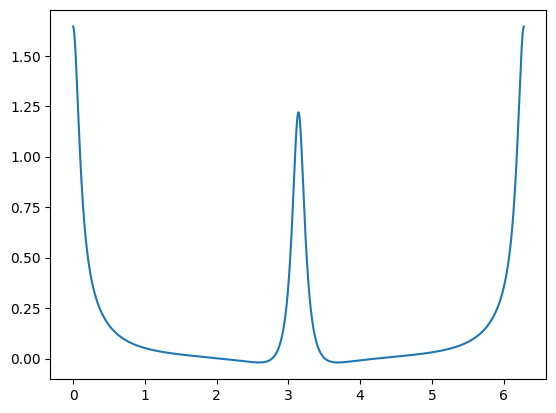

In [25]:
plt.plot(x,f_sym(x,0.8).real+f_asym(x,0.4).real)

In [12]:
from sympy import *

In [13]:
H,Hs = symbols('H H^*',complex=True)
theta,t,alpha,n,omega,eta = symbols('theta t alpha n omega eta')
a = Function('a')('t')
a_s = Function('a^*')('t')
b = Function('b')('t')
b_s = Function('b^*')('t')
A = Sum((a**n*(E**(I*theta))**(2*n-1)),(n,1,6)).doit()
As = Sum((a_s**n*(E**(-I*theta))**(2*n-1)),(n,1,6)).doit()
B = Sum((b**n*(E**(I*theta))**(2*n)),(n,1,6)).doit()
Bs = Sum((b_s**n*(E**(-I*theta))**(2*n)),(n,1,6)).doit()
f = 1/(2*pi) * (1+((A+As)+(B+Bs)))
v = omega + 1/(2*I) * (H*E**(-I*(2*theta+alpha))-Hs*E**(I*(2*theta+alpha)))

In [ ]:
f.diff(t)

((1 - eta)*(6*b(t)**5*exp(6*I*theta)*Derivative(b(t), t) + 5*b(t)**4*exp(5*I*theta)*Derivative(b(t), t) + 4*b(t)**3*exp(4*I*theta)*Derivative(b(t), t) + 3*b(t)**2*exp(3*I*theta)*Derivative(b(t), t) + 2*b(t)*exp(2*I*theta)*Derivative(b(t), t) + 6*b^*(t)**5*exp(-6*I*theta)*Derivative(b^*(t), t) + 5*b^*(t)**4*exp(-5*I*theta)*Derivative(b^*(t), t) + 4*b^*(t)**3*exp(-4*I*theta)*Derivative(b^*(t), t) + 3*b^*(t)**2*exp(-3*I*theta)*Derivative(b^*(t), t) + 2*b^*(t)*exp(-2*I*theta)*Derivative(b^*(t), t) + exp(I*theta)*Derivative(b(t), t) + exp(-I*theta)*Derivative(b^*(t), t))/2 + (eta + 1)*(6*a(t)**5*exp(6*I*theta)*Derivative(a(t), t) + 5*a(t)**4*exp(5*I*theta)*Derivative(a(t), t) + 4*a(t)**3*exp(4*I*theta)*Derivative(a(t), t) + 3*a(t)**2*exp(3*I*theta)*Derivative(a(t), t) + 2*a(t)*exp(2*I*theta)*Derivative(a(t), t) + 6*a^*(t)**5*exp(-6*I*theta)*Derivative(a^*(t), t) + 5*a^*(t)**4*exp(-5*I*theta)*Derivative(a^*(t), t) + 4*a^*(t)**3*exp(-4*I*theta)*Derivative(a^*(t), t) + 3*a^*(t)**2*exp(-3*I*the

In [14]:
col_ = collect(together(f.diff(t)+(f*v).diff(theta)).expand(),E**(1j*theta))

In [15]:
col_

-13*H*a^*(t)**6*exp(-I*alpha)/(4*pi*exp(1.0*I*theta)**13.0) - 7*H*b^*(t)**6*exp(-I*alpha)/(2*pi*exp(1.0*I*theta)**14.0) - 13*H^**a(t)**6*exp(I*alpha)*exp(1.0*I*theta)**13.0/(4*pi) - 7*H^**b(t)**6*exp(I*alpha)*exp(1.0*I*theta)**14.0/(2*pi) + (-11*H*a^*(t)**5*exp(-I*alpha)/(4*pi) - 11*I*omega*a^*(t)**6/(2*pi) + 3*a^*(t)**5*Derivative(a^*(t), t)/pi)/exp(1.0*I*theta)**11.0 + (-3*H*b^*(t)**5*exp(-I*alpha)/pi - 6*I*omega*b^*(t)**6/pi + 3*b^*(t)**5*Derivative(b^*(t), t)/pi)/exp(1.0*I*theta)**12.0 + (-11*H^**a(t)**5*exp(I*alpha)/(4*pi) + 11*I*omega*a(t)**6/(2*pi) + 3*a(t)**5*Derivative(a(t), t)/pi)*exp(1.0*I*theta)**11.0 + (-3*H^**b(t)**5*exp(I*alpha)/pi + 6*I*omega*b(t)**6/pi + 3*b(t)**5*Derivative(b(t), t)/pi)*exp(1.0*I*theta)**12.0 + (-H*exp(-I*alpha)/(2*pi) + H^**b^*(t)**2*exp(I*alpha)/(2*pi) - I*omega*b^*(t)/pi + Derivative(b^*(t), t)/(2*pi))/exp(1.0*I*theta)**2.0 + (-H*a(t)*exp(-I*alpha)/(4*pi) + H^**a^*(t)**2*exp(I*alpha)/(4*pi) - I*omega*a^*(t)/(2*pi) + Derivative(a^*(t), t)/(2*pi))/ex

In [16]:
fa = -I*omega*a + 1/2 *(Hs*a_s*E**(I*alpha)-H*a**2*E**(-I*alpha))

In [18]:
Reals(fa)

TypeError: 'Reals' object is not callable

In [26]:
def to_complex(Zs):
    a1real,a1imag,b1real,b1imag,a2real,a2imag,b2real,b2imag = Zs.T
    a1 = a1real + 1j*a1imag
    a2 = a2real + 1j*a2imag
    b1 = b1real + 1j*b1imag
    b2 = b2real + 1j*b2imag
    return a1,b1,a2,b2

In [54]:
@jit(nopython=True)
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

@jit(nopython=True)
def dZ_dt(Zs,t,alpha,beta,eta1,eta2):
    a1real,a1imag,b1real,b1imag,a2real,a2imag,b2real,b2imag = Zs
    a1 = a1real + 1j*a1imag
    a2 = a2real + 1j*a2imag
    b1 = b1real + 1j*b1imag
    b2 = b2real + 1j*b2imag
    Z11 = eta1*np.conj(a1)
    Z12 = eta2*np.conj(a2)
    H1 = Z11**2 + 2*beta*Z11*Z12 + beta**2*Z12**2
    H2 = Z12**2 + 2*beta*Z11*Z12 + beta**2*Z11**2
    
    da1 = 1/2 *(np.conj(H1)*np.conj(a1)*np.exp(1j*alpha) - H1*a1**2*np.exp(-1j*alpha) )
    db1 = (np.conj(H1)*np.exp(1j*alpha) - H1*b1**2*np.exp(-1j*alpha) )
    da2 = 1/2 *(np.conj(H2)*np.conj(a2)*np.exp(1j*alpha) - H2*a2**2*np.exp(-1j*alpha) )
    db2 = (np.conj(H2)*np.exp(1j*alpha) - H2*b2**2*np.exp(-1j*alpha) )
    return np.array([da1.real,da1.imag,db1.real,db1.imag,da2.real,da2.imag,db2.real,db2.imag])

def to_complex(Zs):
    a1real,a1imag,b1real,b1imag,a2real,a2imag,b2real,b2imag = Zs.T
    a1 = a1real + 1j*a1imag
    a2 = a2real + 1j*a2imag
    b1 = b1real + 1j*b1imag
    b2 = b2real + 1j*b2imag
    return a1,b1,a2,b2

In [56]:
alpha = 1.2
beta = 0.2
eta1 = 0.2
eta2 = 0.1

In [60]:
t = np.arange(0,5000,0.01)

In [68]:
A1 = 1
A2 = np.sqrt(0.6)
shift = 0.0 * np.pi

a1 =  eta1*0.2 + 0j
b1 =  0.2 + 0j
a2 =  eta2 * np.sqrt(0.6) + 0j
b2 =  0.6 + 0j

Zs = RK4(dZ_dt,np.array([a1.real,a1.imag,b1.real,b1.imag,a2.real,a2.imag,b2.real,b2.imag]),t,args=(alpha,beta,eta1,eta2))#[::1000]
a1s,b1s,a2s,b2s = to_complex(Zs)


(0.0, 1.0)

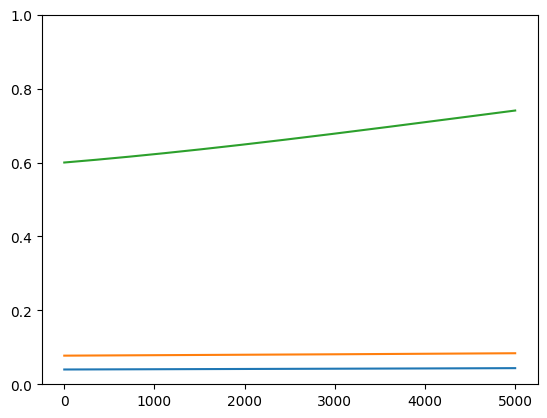

In [69]:
plt.plot(t,np.abs(a1s))
plt.plot(t,np.abs(a2s))
plt.plot(t,np.abs(b2s))
plt.ylim(0,1)